In [114]:
# Author(s): Haley Botteron
%matplotlib inline
import matplotlib.pyplot as plt
import pylab
import numpy as np
import csv
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from sklearn.metrics import mean_squared_error
from math import sqrt
from scipy.optimize import curve_fit


In [221]:
def smash(a1,a2,a3,a4, col):
    arrayofarrays=[a1,a2,a3,a4]
    finalarray = []
    for x in range (0,4):
        for y in range (0,360):
            finalarray.append((arrayofarrays[x])[y,col])
    return finalarray



def modelFit(name):
     #Read in parameters for all 5 trials for subject
    filename = name + '_parameters.txt'
    with open (filename, 'rb') as datafile:
        parameters = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
    # Read in discomfort Values
    filename = "ResampledBlinks" +name + '_Trial1OK.txt'
    with open (filename, 'rb') as datafile:
        data1 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)
    filename = "ResampledBlinks" +name + '_Trial2OK.txt'
    with open (filename, 'rb') as datafile:
        data2 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)
    filename = "ResampledBlinks" +name + '_Trial3OK.txt'
    with open (filename, 'rb') as datafile:
        data3 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)
    filename = "ResampledBlinks" +name + '_Trial4OK.txt'
    with open (filename, 'rb') as datafile:
        data4 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)
    filename = "ResampledBlinks" +name + '_Trial5OK.txt'
    with open (filename, 'rb') as datafile:
        data5 = np.genfromtxt(datafile, delimiter = '\t',dtype=None)
    avgArray = []
    data = []
    data.append(data1)
    data.append(data2)
    data.append(data3)
    data.append(data4)
    data.append(data5)

    for m in range (0,5):

        if m==0:
            bigDataX= smash(data2,data3,data4,data5,0)
            bigDataY= smash(data2,data3,data4,data5,1)
            points = zip(bigDataX, bigDataY)
            sorted(points)
            sorted_points = sorted(points)
            new_BigX = [point[0] for point in sorted_points]
            new_BigY = [point[1] for point in sorted_points] 
            #a = np.asarray(new_BigX)
            #b = np.asarray(new_BigY)
            #avgArray = np.mean(np.column_stack((a,b)), axis=1)
            #print avgArray, avgArray.shape

        if m==1:
            bigDataX= smash(data1,data3,data4,data5,0)
            bigDataY= smash(data1,data3,data4,data5,1)
            points = zip(bigDataX, bigDataY)
            sorted(points)
            sorted_points = sorted(points)
            new_BigX = [point[0] for point in sorted_points]
            new_BigY = [point[1] for point in sorted_points] 
            #a = np.asarray(new_BigX)
            #b = np.asarray(new_BigY)
            #avgArray = np.mean(np.column_stack((a,b)), axis=1)
        if m==2:
            bigDataX= smash(data1,data2,data4,data5,0)
            bigDataY= smash(data1,data2,data4,data5,1)
            points = zip(bigDataX, bigDataY)
            sorted(points)
            sorted_points = sorted(points)
            new_BigX = [point[0] for point in sorted_points]
            new_BigY = [point[1] for point in sorted_points] 
            #a = np.asarray(new_BigX)
            #b = np.asarray(new_BigY)
            #avgArray = np.mean(np.column_stack((a,b)), axis=1)
        if m==3:
            bigDataX= smash(data1,data2,data3,data5,0)
            bigDataY= smash(data1,data2,data3,data5,1)
            points = zip(bigDataX, bigDataY)
            sorted(points)
            sorted_points = sorted(points)
            new_BigX = [point[0] for point in sorted_points]
            new_BigY = [point[1] for point in sorted_points]
            #a = np.asarray(new_BigX)
            #b = np.asarray(new_BigY)
            #avgArray = np.mean(np.column_stack((a,b)), axis=1)
        if m==4:
            bigDataX= smash(data1,data2,data3,data4,0)
            bigDataY= smash(data1,data2,data3,data4,1)
            points = zip(bigDataX, bigDataY)
            sorted(points)
            sorted_points = sorted(points)
            new_BigX = [point[0] for point in sorted_points]
            new_BigY = [point[1] for point in sorted_points] 
            #a = np.asarray(new_BigX)
            #b = np.asarray(new_BigY)
            #avgArray = np.mean(np.column_stack((a,b)), axis=1)
        a = parameters[(m*5)+0+m][2]
        b = parameters[(m*5)+1+m][2]
        c = parameters[(m*5)+2+m][2]
        k = parameters[(m*5)+3+m][2]
        h = parameters[(m*5)+4+m][2]
        r = parameters[(m*5)+5+m][2]
        print a,b,c,k,h,r
        ## creating other two models
        print len(new_BigX), len(new_BigY)
        def y_av_lowess(y):
            def movingaverage(interval, window_size):
                window= np.ones(int(window_size))/float(window_size)
                return np.convolve(interval, window, 'same') 
            y_av = movingaverage(y, 10)
            y_av_lowess = lowess(y_av, new_x, frac=lowess_fraction, return_sorted=False) 
            return y_av_lowess
    
        def funcTooth( x, trough, peak):
        #using a "ternary" for where func below
            return np.where(x >= 75.,trough*np.ones_like(x),
                            (np.where(x <= 60.0, trough+ x*(peak-trough)/60., trough+ (x -75.)*(peak-trough)/(60.-75.))))
     
        def funcBox (x, base, top):
            return np.where( x<=60.,top*np.ones_like(x),base*np.ones_like(x))
#build sawtooth
        popt, pcov = curve_fit(funcTooth, new_BigX, new_BigY)
        xFit = np.linspace(0, 90, 360)
        yFit = funcTooth(xFit, *popt)
        plot(xFit,yFit)
#build box
        popt2, pcov2 = curve_fit(funcBox, new_BigX, new_BigY)
        xBoxFit = np.linspace(0, 90, 360)
        yBoxFit = funcBox(xBoxFit, *popt2)
        plot(xBoxFit,yBoxFit)
    # build avg Model
        popt3, pcov3 = curve_fit(y_av_lowess,new_BigX, new_BigY)
        xAvgFit = np.linspace(0, 90, 360)
        yAvgFit = y_av_lowess(xAvgFit, *popt3)
        #plot(xAvgFit,yAvgFit)
#build our model
        Signal = []
        term1 = []
        term2 = []
        term3 = []
        actualDisc = []
        totTime = []
        for CurEntry in range (0, len(data1),1):
            tindex = CurEntry
            t_i = data[m][tindex][2]
            totTime.append(data[m][CurEntry][2])
            actualDisc.append(data[m][CurEntry][1])
        ##first model term (when to take off)
            if ( t_i < c ):
                term1.append(0) 
            else:
                term1.append( a*np.sqrt(t_i - c))
        ## intent is to use a>0 and 0 <= c <= 20

        ## second model term 
            term2.append(b) 

            if ( CurEntry == 0 ):
                term3.append(0) 
            else :
                previous_term3 = term3

            ## sum over j < i (sum where eyes are closed) - must read in fraction part?
                eye_closure_sum = 0.0
                for  j in range (0, CurEntry, 1):
                    t_delta = t_i - data[m][j][2]
                    f_j = data[m][j][3]
                    if ( f_j > 0.0 and t_delta <= 2*h ):
                        Hij = (t_delta*(2*h-t_delta))/pow(h,2)
                        eye_closure_sum = eye_closure_sum + f_j*Hij

            ## third model term
                term3.append( k*eye_closure_sum)
            if (t_i<= 60.0):
                Signal.append(term1[CurEntry] + term2[CurEntry] + term3[CurEntry])

            else:
                Signal.append(Signal[CurEntry-1] + t_delta*data[m][CurEntry-1][3]*(-r)*(Signal[CurEntry-1]-b))
      
        print len(actualDisc),len(yFit), len(xAvgFit)
        RSSModel = mean_squared_error(actualDisc, Signal)*(len(Signal))
        RSSSawtooth = mean_squared_error(actualDisc, yFit)*(len(yFit))
        RSSBox = mean_squared_error(actualDisc, yBoxFit)*(len(yBoxFit))
        RSSAvgModel = mean_squared_error(actualDisc, yAvgFit)*(len(yAvgFit))
        rmse = sqrt(mean_squared_error(actualDisc, Signal))

        print "rmse :" , rmse, 'RSS:', RSSModel, RSSSawtooth, RSSBox
        print np.cov(actualDisc, Signal)
        print "correlation to our model:", np.corrcoef(actualDisc, Signal)[0,1]
        print "correlation to sawtooth:", np.corrcoef(actualDisc, yFit)[0,1]
        print "correlation to box:", np.corrcoef(actualDisc, yBoxFit)[0,1]
        print "correlation to avg Model:", np.corrcoef(actualDisc, yAvgFit)[0,1]
        plot (totTime, actualDisc, label='Actual Discomfort')
        plot (totTime, Signal, label='Modeled Discomfort')
        plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
        #plot (xAvgFit,yAvgFit)
   
    return 




In [3]:
def modelFit1Trial(name,trialnum, a,b,c,k,h,r):
     #Read in parameters for all 5 trials for subject
    filename = name + '_parameters.txt'
    with open (filename, 'rb') as datafile:
        parameters = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
    # Read in discomfort Values
    filename = "ResampledBlinks" +name + '_Trial'+trialnum+'OK.txt'
    with open (filename, 'rb') as datafile:
        data1 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)

    def funcTooth( x, trough, peak):
        #using a "ternary" for where func below
            return np.where(x > 75.,trough*np.ones_like(x),
                            (np.where(x < 60.0, trough+ x*(peak-trough)/60., trough+ (x -75.)*(peak-trough)/(60.-75.))))

    
    popt, pcov = curve_fit(funcTooth, data1[:,0], data1[:,1])
    xFit = np.linspace(0, 90, len(data1))
    yFit = funcTooth(xFit, *popt)
    plot(xFit,yFit)
    
    def funcBox (x, base, top):
        return np.where( x>60.,top*np.ones_like(x),base*np.ones_like(x))
    popt2, pcov2 = curve_fit(funcBox, data1[:,0], data1[:,1])
    xBoxFit = np.linspace(0, 90, len(data1))
    yBoxFit = funcBox(xBoxFit, *popt2)
    plot(xBoxFit,yBoxFit)    

    Signal = []
    term1 = []
    term2 = []
    term3 = []
    actualDisc = []
    totTime = []
    SSDModel = []
    for CurEntry in range (0, len(data1),1):
        tindex = CurEntry
        t_i = data1[tindex][2]
        totTime.append(data1[CurEntry][0])
        actualDisc.append(data1[CurEntry][1])
        ##first model term (when to take off)
        if ( t_i < c ):
            term1.append(0) 
        else:
            term1.append( a*np.sqrt(t_i - c))
        ## intent is to use a>0 and 0 <= c <= 20
       
        ## second model term 
        term2.append(b) 
            
        if ( CurEntry == 0 ):
            term3.append(0) 
        else :
            previous_term3 = term3

            ## sum over j < i (sum where eyes are closed) - must read in fraction part?
            eye_closure_sum = 0.0
            for  j in range (0, CurEntry, 1):
                t_delta = t_i - data1[j][2]
                f_j = data[j][3]
                if ( f_j > 0.0 and t_delta <= 2*h ):
                    Hij = (t_delta*(2*h-t_delta))/pow(h,2)
                    eye_closure_sum = eye_closure_sum + f_j*Hij
              
            ## third model term
            term3.append( k*eye_closure_sum)
        if (t_i<= 60.0):
            Signal.append(term1[CurEntry] + term2[CurEntry] + term3[CurEntry])
        
        else:
            Signal.append(Signal[CurEntry-1] + t_delta*data1[CurEntry-1][3]*(-r)*(Signal[CurEntry-1]-b))
    
    rmse = sqrt(mean_squared_error(actualDisc, Signal))
    RSSModel = mean_squared_error(actualDisc, Signal)*(len(Signal))
    RSSSawtooth = mean_squared_error(actualDisc, yFit)*(len(yFit))
    RSSBox = mean_squared_error(actualDisc, yBoxFit)*(len(yBoxFit))
    print len(Signal), len(yFit), len(yBoxFit)
    print "rmse :" , rmse, 'RSS:', RSSModel, RSSSawtooth, RSSBox
    print np.cov(actualDisc, Signal)
    print "correlation to our model:", np.corrcoef(actualDisc, Signal)[0,1]
    print "correlation to sawtooth:", np.corrcoef(actualDisc, yFit)[0,1]
    print "correlation to box:", np.corrcoef(actualDisc, yBoxFit)[0,1]

    plot (totTime, actualDisc, label='Actual Discomfort')
    plot (totTime, Signal, label='Modeled Discomfort')
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)

    return 





[[  0.125       -1.27536678   0.125        0.        ]
 [  0.375       -1.27409953   0.375        0.4       ]
 [  0.625       -1.2734122    0.625        0.        ]
 ..., 
 [ 89.375       -1.30299217  89.375        0.        ]
 [ 89.625       -1.30302413  89.625        0.        ]
 [ 89.875       -1.30306962  89.875        0.        ]]
(360, 4)
(360,)
360 360 360
rmse : 0.665402698633 RSS: 159.393870485 150.744029676 292.154354207
[[ 1.32368075  0.63835983]
 [ 0.63835983  0.35982242]]
correlation to our model: 0.924974600209
correlation to sawtooth: 0.826309609183
correlation to box: 0.620643911342


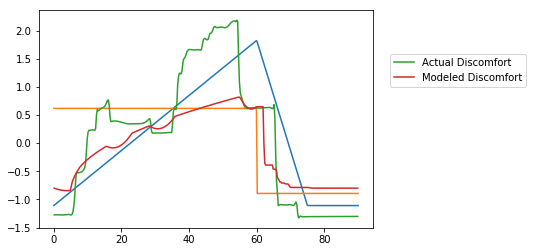

In [688]:
modelFit1Trial('TM101','1',0.23, -0.8, 5.06, -0.11, 3.77, 1.77)

[[  0.125       -1.16317555   0.125        0.2       ]
 [  0.375       -1.16326445   0.375        0.        ]
 [  0.625       -1.1633625    0.625        0.        ]
 ..., 
 [ 89.375       -0.87515203  89.375        1.        ]
 [ 89.625       -0.87515062  89.625        1.        ]
 [ 89.875       -0.87514461  89.875        1.        ]]
(360, 4)
(360,)
360 360 360
rmse : 1.80058585829 RSS: 1167.15939591 123.489611924 271.700073046
[[ 1.18827428  0.03462566]
 [ 0.03462566  0.04380548]]
correlation to our model: 0.151766332704
correlation to sawtooth: 0.842928789904
correlation to box: 0.602568838819


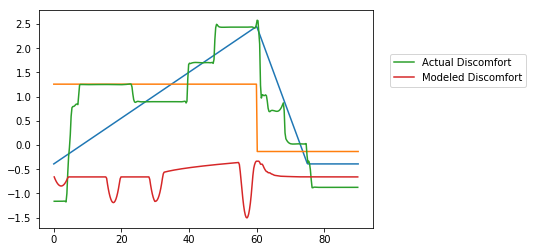

In [689]:
modelFit1Trial('TM205','2',0.06, -0.66, 29.99, -0.47, 2.05, 0.7)

[[  0.125       -0.87513365   0.125        0.73333333]
 [  0.375       -0.87511739   0.375        0.        ]
 [  0.625       -0.87509548   0.625        0.        ]
 ..., 
 [ 89.375       -0.69471035  89.375        0.        ]
 [ 89.625       -0.69447907  89.625        0.        ]
 [ 89.875       -0.69423567  89.875        0.        ]]
(360, 4)
(360,)
360 360 360
rmse : 1.72040693424 RSS: 1065.52800698 35.5682729289 258.96044719
[[ 0.92593223 -0.00227561]
 [-0.00227561  0.12475167]]
correlation to our model: -0.00669553314824
correlation to sawtooth: 0.944992353847
correlation to box: 0.470063773998


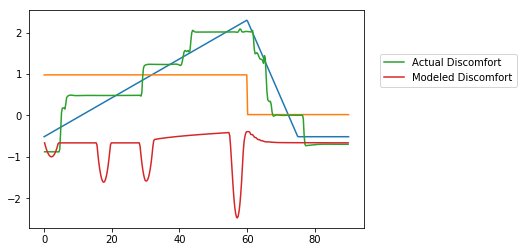

In [690]:
modelFit1Trial('TM205','3',0.05,-0.66,29.95, -0.84, 2.03, 0.71)

[[  0.125       -0.69398573   0.125        0.        ]
 [  0.375       -0.69373481   0.375        0.        ]
 [  0.625       -0.6934885    0.625        0.        ]
 ..., 
 [ 89.375       -0.62336017  89.375        0.4       ]
 [ 89.625       -0.62298639  89.625        0.        ]
 [ 89.875       -0.62260935  89.875        0.        ]]
(360, 4)
(360,)
360 360 360
rmse : 0.806795141509 RSS: 234.33062413 26.1825790626 55.2254187622
[[ 0.23959437  0.00790253]
 [ 0.00790253  0.05757926]]
correlation to our model: 0.0672813860044
correlation to sawtooth: 0.834033296523
correlation to box: 0.598290333807


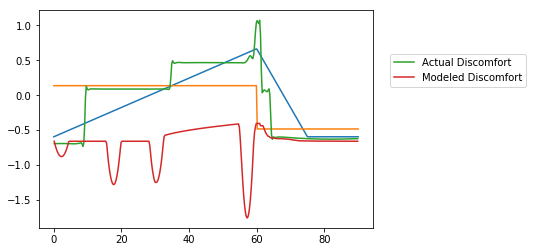

In [697]:
modelFit1Trial('TM205','4',0.05,-0.66,29.97,-0.55, 2.15, 0.71)

[[  0.125       -2.98976579   0.125        0.        ]
 [  0.375       -2.9888982    0.375        0.        ]
 [  0.625       -2.99102131   0.625        0.        ]
 ..., 
 [ 89.375       -1.53711892  89.375        0.        ]
 [ 89.625       -1.53419109  89.625        0.        ]
 [ 89.875       -1.53124957  89.875        0.        ]]
(360, 4)
(360,)
360 360 360
rmse : 0.720393721297 RSS: 186.828160926 226.381233416 293.860091543
[[ 1.16652195  0.65922522]
 [ 0.65922522  0.62060694]]
correlation to our model: 0.774781142088
correlation to sawtooth: 0.67781603026
correlation to box: 0.546165855214


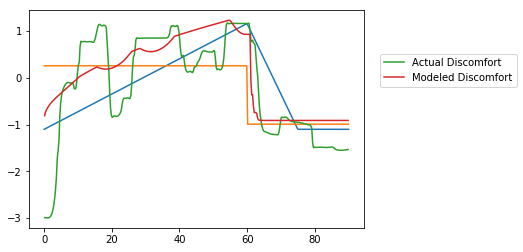

In [677]:
modelFit1Trial('TM102',0.29, -0.91, 0.0, -0.16, 5.13, 2.68)

[[  0.125       -1.05532535   0.125        0.        ]
 [  0.375       -1.05486551   0.375        0.        ]
 [  0.625       -1.05463359   0.625        0.        ]
 ..., 
 [ 89.375       -1.03116649  89.375        0.46666667]
 [ 89.625       -1.03339165  89.625        0.        ]
 [ 89.875       -1.03535521  89.875        0.        ]]
(360, 4)
(360,)
rmse : 0.841291779567
[[ 1.14304027  0.56588318]
 [ 0.56588318  0.66033477]]
correlation to our model: 0.651349277853
correlation to sawtooth: 0.574771104593
correlation to box: 0.643972305389


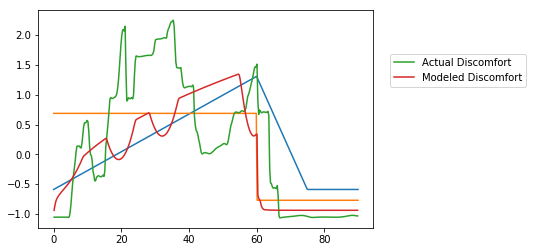

In [503]:
modelFit1Trial('TM103',0.31, -0.94, 0.26, -0.45, 4.31, 3.41) 

(360, 4)
0.23 -0.8 5.06 -0.11 3.77 1.77
RSSModel Check 159.393554609
rmse : 0.665402039307 RSS: 159.393554609 177.606274415 325.196279313
[[ 1.32368075  0.63863641]
 [ 0.63863641  0.36051219]]
correlation to our model: 0.924489692331
correlation to sawtooth: 0.826309609183
correlation to box: 0.620643911342
0.27 -0.83 5.81 -0.13 3.66 1.46
RSSModel Check 120.734521242
rmse : 0.579114556989 RSS: 120.734521242 199.093561813 186.372520522
[[ 0.72727446  0.48033109]
 [ 0.48033109  0.48853686]]
correlation to our model: 0.805828935354
correlation to sawtooth: 0.628199016382
correlation to box: 0.634249679918
0.24 -0.83 4.57 -0.12 3.84 1.51
RSSModel Check 224.784331225
rmse : 0.790190432788 RSS: 224.784331225 228.88926029 424.681378933
[[ 1.44729129  0.64090723]
 [ 0.64090723  0.40467074]]
correlation to our model: 0.837464285217
correlation to sawtooth: 0.786009718151
correlation to box: 0.455912765648
0.24 -0.86 4.02 -0.11 3.88 1.61
RSSModel Check 140.191646229
rmse : 0.624036248567 RSS: 14

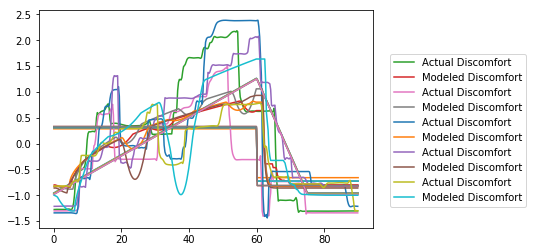

In [9]:
modelFit('TM101')

(360, 4)
[ -0.70169621  -0.50728716  -0.47051652 ...,  44.40500034  44.5582856
  44.58218293] (1440,)
0.29 -0.91 0.0 -0.16 5.13 2.68
rmse : 0.664800169789 RSS: 159.105335671 256.090940134 314.294039817
[[ 1.16652195  0.60822771]
 [ 0.60822771  0.48320996]]
correlation to our model: 0.810124581376
correlation to sawtooth: 0.67781603026
correlation to box: 0.546165855214
0.3 -0.94 0.01 -0.2 5.89 2.73
rmse : 0.745201594337 RSS: 199.917149833 263.561380733 215.363121933
[[ 1.11575163  0.59944542]
 [ 0.59944542  0.61119856]]
correlation to our model: 0.725896531019
correlation to sawtooth: 0.59259352443
correlation to box: 0.688581293866
0.29 -0.96 0.63 -0.14 4.29 2.12
rmse : 0.596604360129 RSS: 128.137234509 344.413918116 186.120314651
[[ 1.27313745  0.78110964]
 [ 0.78110964  0.63565773]]
correlation to our model: 0.868285770606
correlation to sawtooth: 0.517734377113
correlation to box: 0.824744734468
0.31 -1.01 0.64 -0.14 4.04 2.2
rmse : 0.502401377428 RSS: 90.8665718548 232.373547577 1

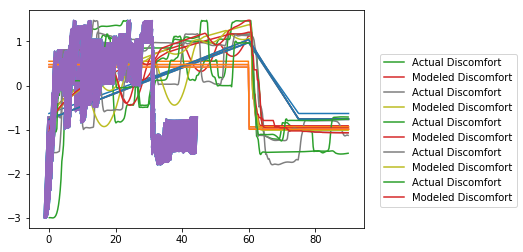

In [164]:
modelFit('TM102')

(360, 4)
0.31 -0.94 0.26 -0.45 4.31 3.41
RSSModel Check 239.591878519
rmse : 0.815802056805 RSS: 239.591878519 302.551431535 264.084542175
[[ 1.14304027  0.59130509]
 [ 0.59130509  0.64698059]]
correlation to our model: 0.687598985579
correlation to sawtooth: 0.574771104593
correlation to box: 0.643972305389
0.27 -0.93 0.09 -0.37 2.8 1.92
RSSModel Check 118.152608809
rmse : 0.57288889947 RSS: 118.152608809 279.23205587 166.524837967
[[ 1.00153712  0.55823543]
 [ 0.55823543  0.43787504]]
correlation to our model: 0.842963518238
correlation to sawtooth: 0.477663891843
correlation to box: 0.744611825037
0.27 -0.91 0.06 -0.31 3.41 3.03
RSSModel Check 173.593196646
rmse : 0.694408614589 RSS: 173.593196646 361.422757376 367.885372078
[[ 1.46008078  0.78182264]
 [ 0.78182264  0.54535678]]
correlation to our model: 0.876151978003
correlation to sawtooth: 0.638912390619
correlation to box: 0.576369580319
0.36 -0.95 0.9 -0.53 5.04 2.62
RSSModel Check 231.723514558
rmse : 0.802294477937 RSS: 231.

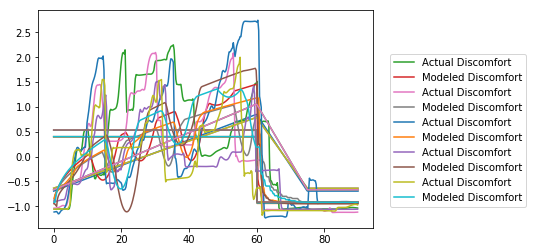

In [10]:
modelFit('TM103')

(360, 4)
0.32 -0.97 0.0 -0.2 7.38 5.56
RSSModel Check 404.05465344
rmse : 1.0594215579 RSS: 404.05465344 263.530050816 482.949313227
[[ 0.89872369  0.1104561 ]
 [ 0.1104561   0.38237863]]
correlation to our model: 0.188421225378
correlation to sawtooth: 0.527688243812
correlation to box: -0.0605789185468
0.35 -1.08 0.08 -0.17 7.26 5.54
RSSModel Check 258.226731134
rmse : 0.846933571995 RSS: 258.226731134 182.87856196 117.442065793
[[ 0.24546732  0.18250986]
 [ 0.18250986  0.82350323]]
correlation to our model: 0.405935319445
correlation to sawtooth: 0.0421146768809
correlation to box: 0.0854301449093
0.31 -0.89 4.51 -0.13 8.25 5.98
RSSModel Check 139.242504001
rmse : 0.621920198528 RSS: 139.242504001 316.455521526 310.523981028
[[ 1.0914487   0.76611281]
 [ 0.76611281  0.73412392]]
correlation to our model: 0.855867177126
correlation to sawtooth: 0.629469666636
correlation to box: 0.784026785642
0.24 -0.62 2.82 -0.13 7.04 4.6
RSSModel Check 127.767352785
rmse : 0.595742656936 RSS: 127.

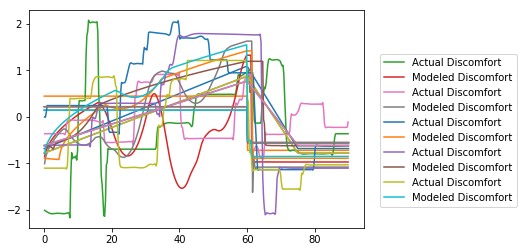

In [11]:
modelFit('TM104')

(360, 4)
0.26 -1.07 0.0 -0.55 4.06 1.95
RSSModel Check 194.509298268
rmse : 0.735053471729 RSS: 194.509298268 222.415757619 287.605336319
[[ 0.63933708  0.37544917]
 [ 0.37544917  0.48079011]]
correlation to our model: 0.677186732603
correlation to sawtooth: 0.542366282972
correlation to box: 0.359840809471
0.23 -0.79 0.21 -0.68 4.15 3.4
RSSModel Check 70.4509887451
rmse : 0.442376752281 RSS: 70.4509887451 173.692993979 132.431551713
[[ 0.79040246  0.54964861]
 [ 0.54964861  0.47136966]]
correlation to our model: 0.900492667084
correlation to sawtooth: 0.675212672777
correlation to box: 0.8055697629
0.26 -1.04 0.05 -0.47 3.96 1.5
RSSModel Check 122.485778374
rmse : 0.583299471336 RSS: 122.485778374 266.517645071 168.343225301
[[ 0.83749025  0.49253467]
 [ 0.49253467  0.48399908]]
correlation to our model: 0.773614597744
correlation to sawtooth: 0.461231682029
correlation to box: 0.720474407011
0.24 -0.97 0.01 -0.59 4.0 2.66
RSSModel Check 406.688980837
rmse : 1.06286951854 RSS: 406.688

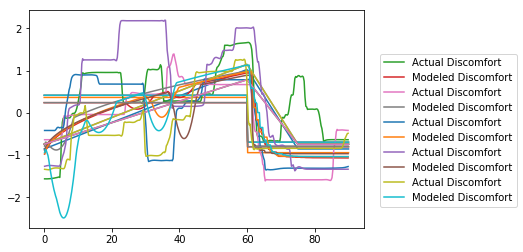

In [12]:
modelFit('TM105')

(360, 4)
0.36 -1.33 0.62 -0.38 4.32 0.62
RSSModel Check 66.9460678202
rmse : 0.431232303406 RSS: 66.9460678202 77.1115777528 278.601161931
[[ 1.00112659  0.8895945 ]
 [ 0.8895945   0.95411642]]
correlation to our model: 0.910221111489
correlation to sawtooth: 0.891188073404
correlation to box: 0.490409005871
0.39 -1.31 2.11 -0.26 7.28 0.49
RSSModel Check 159.249241425
rmse : 0.665100747225 RSS: 159.249241425 214.788303112 187.584903012
[[ 1.002324    0.73932772]
 [ 0.73932772  0.83374234]]
correlation to our model: 0.808755032656
correlation to sawtooth: 0.650810274167
correlation to box: 0.705021961079
0.35 -1.33 1.08 -0.27 5.29 0.62
RSSModel Check 85.4325665573
rmse : 0.487147498076 RSS: 85.4325665573 131.164917701 320.327244652
[[ 1.1073068   0.92492328]
 [ 0.92492328  0.8492079 ]]
correlation to our model: 0.953816244917
correlation to sawtooth: 0.919107933621
correlation to box: 0.582711663125
0.39 -1.26 2.32 -0.29 6.08 0.53
RSSModel Check 72.86571939
rmse : 0.449894183207 RSS: 72

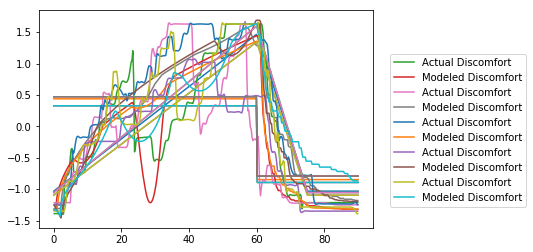

In [13]:
modelFit('TM106')

(360, 4)
0.27 -1.18 10.3 -1.0 2.54 0.29
RSSModel Check 144.221224818
rmse : 0.632941161076 RSS: 144.221224818 240.94703789 190.170442456
[[ 0.34931664  0.18280688]
 [ 0.18280688  0.3118644 ]]
correlation to our model: 0.553859994716
correlation to sawtooth: 0.355067425681
correlation to box: -0.323125353494
0.24 -1.16 9.95 -0.91 2.42 0.29
RSSModel Check 363.884494606
rmse : 1.00538065567 RSS: 363.884494606 226.042553365 514.62843361
[[ 1.3722338   0.42272826]
 [ 0.42272826  0.28024279]]
correlation to our model: 0.681679133697
correlation to sawtooth: 0.81940638669
correlation to box: 0.175062444268
0.24 -1.39 0.01 -1.0 7.12 0.22
RSSModel Check 73.6995169203
rmse : 0.452460915808 RSS: 73.6995169203 109.118955338 139.050037259
[[ 0.30385534  0.15679296]
 [ 0.15679296  0.17775883]]
correlation to our model: 0.674648474184
correlation to sawtooth: 0.682802747372
correlation to box: -0.0739898393082
0.24 -1.15 9.93 -0.92 2.37 0.34
RSSModel Check 634.564860217
rmse : 1.32765965792 RSS: 634.

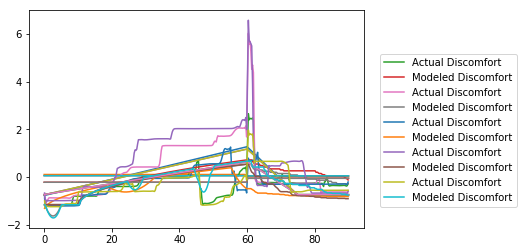

In [14]:
modelFit('TM107')

0.29 -0.77 1.91 -0.38 4.73 1.03
rmse : 0.709809522723 RSS: 181.378641078 314.927888959 216.481052171
[[ 1.15826047  0.63104023]
 [ 0.63104023  0.56878264]]
correlation to our model: 0.777464847045
correlation to sawtooth: 0.492574753974
correlation to box: 0.692374154213
0.29 -0.76 1.92 -0.53 4.24 1.25
rmse : 0.945351065325 RSS: 321.727909216 273.181566913 222.952699902
[[ 0.86641645  0.71808924]
 [ 0.71808924  1.42505937]]
correlation to our model: 0.646247082542
correlation to sawtooth: 0.348895266187
correlation to box: 0.532175308045
0.25 -0.78 0.12 -0.38 4.28 2.08
rmse : 0.547333611537 RSS: 107.846669634 151.540467527 278.517577215
[[ 1.1237059   0.68488412]
 [ 0.68488412  0.52021631]]
correlation to our model: 0.895774674273
correlation to sawtooth: 0.790164556711
correlation to box: 0.556410374028
0.26 -0.85 0.11 -0.36 4.29 5.23
rmse : 0.54540048827 RSS: 107.086209338 72.3354364454 240.194146516
[[ 0.87864938  0.63022088]
 [ 0.63022088  0.59003801]]
correlation to our model: 0.8

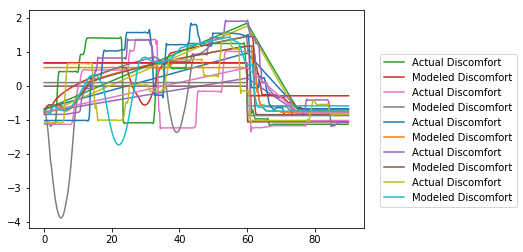

In [597]:
modelFit('TM108')

(360, 4)
0.35 -0.82 11.15 -0.26 7.51 1.72
RSSModel Check 509.700085634
rmse : 1.18988804986 RSS: 509.700085634 432.064046762 411.147727009
[[ 1.12043167  0.30987288]
 [ 0.30987288  0.80025166]]
correlation to our model: 0.327248441403
correlation to sawtooth: 0.457942246485
correlation to box: 0.602559299445
0.33 -0.77 13.21 -0.07 10.0 1.26
RSSModel Check 188.996978579
rmse : 0.724563045679 RSS: 188.996978579 221.435426297 223.107898251
[[ 0.8436676   0.47353119]
 [ 0.47353119  0.53388773]]
correlation to our model: 0.70556647551
correlation to sawtooth: 0.563390855718
correlation to box: 0.559474028707
0.36 -0.92 9.09 -0.26 8.02 1.85
RSSModel Check 240.253990017
rmse : 0.816928512474 RSS: 240.253990017 168.288014189 276.952515106
[[ 0.62451721  0.34312542]
 [ 0.34312542  0.69339692]]
correlation to our model: 0.521422454182
correlation to sawtooth: 0.585226974343
correlation to box: 0.102986061229
0.27 -0.66 8.45 -0.16 7.87 1.91
RSSModel Check 82.6841418011
rmse : 0.479247505648 RSS: 

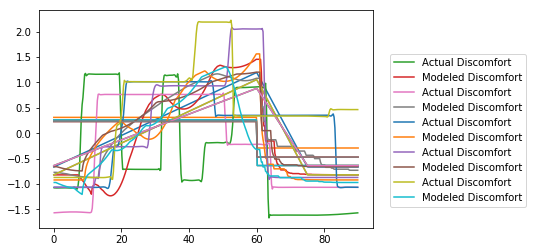

In [15]:
modelFit('TM109')

(360, 4)
0.35 -1.15 5.79 -0.31 0.08 1.11
RSSModel Check 94.589085155
rmse : 0.512588976436 RSS: 94.589085155 207.606480841 107.67582717
[[ 0.72942722  0.6877672 ]
 [ 0.6877672   0.90885453]]
correlation to our model: 0.844701537867
correlation to sawtooth: 0.609994925333
correlation to box: 0.775500155754
0.35 -0.98 4.76 -0.04 4.36 1.47
RSSModel Check 40.7532012832
rmse : 0.336457035738 RSS: 40.7532012832 91.7163486594 176.356283324
[[ 0.80556244  0.85383786]
 [ 0.85383786  0.93272474]]
correlation to our model: 0.985029092243
correlation to sawtooth: 0.849699601789
correlation to box: 0.658432768903
0.33 -1.16 4.08 -0.58 0.08 1.12
RSSModel Check 118.197527982
rmse : 0.572997789364 RSS: 118.197527982 139.795207576 398.233349388
[[ 1.30183685  0.88419454]
 [ 0.88419454  0.78879436]]
correlation to our model: 0.872544630383
correlation to sawtooth: 0.885620529129
correlation to box: 0.437589301705
0.34 -1.2 3.36 -0.32 10.0 1.01
RSSModel Check 181.846611196
rmse : 0.710724613014 RSS: 181.

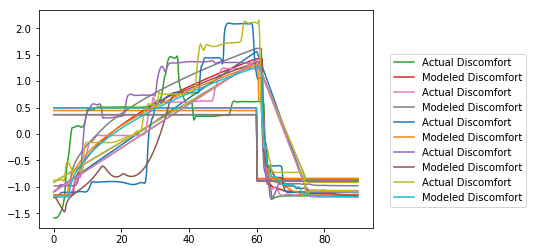

In [16]:
modelFit('TM111')

(360, 4)
0.14 -0.13 3.95 -0.33 0.02 0.35
RSSModel Check 927.150647742
rmse : 1.60481103746 RSS: 927.150647742 783.010647872 765.253808876
[[ 1.81194179  0.28114295]
 [ 0.28114295  0.11391041]]
correlation to our model: 0.618832860116
correlation to sawtooth: 0.521310855702
correlation to box: 0.72130019303
0.14 -0.11 3.68 -0.29 0.07 0.33
RSSModel Check 524.44181206
rmse : 1.206972581 RSS: 524.44181206 278.77888969 243.882513734
[[ 0.68264974  0.20747633]
 [ 0.20747633  0.11531501]]
correlation to our model: 0.739480402487
correlation to sawtooth: 0.53708660701
correlation to box: 0.659080793947
0.19 -0.43 2.66 -0.31 0.02 0.42
RSSModel Check 84.8883871028
rmse : 0.485593528875 RSS: 84.8883871028 159.331474888 219.252824688
[[ 0.21886967  0.12025397]
 [ 0.12025397  0.25181967]]
correlation to our model: 0.51222622753
correlation to sawtooth: 0.461342409558
correlation to box: 0.0917873932732
0.12 -0.05 4.15 -0.48 0.06 2.09
RSSModel Check 118.04327076
rmse : 0.572623763334 RSS: 118.043270

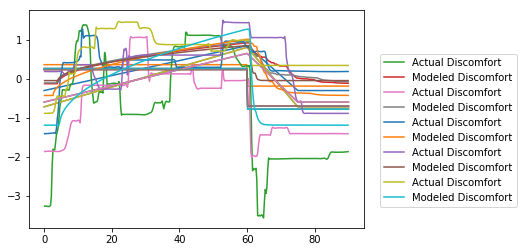

In [17]:
modelFit('TM112')

(360, 4)
0.38 -1.24 0.01 -0.35 8.85 1.13
RSSModel Check 108.161576121
rmse : 0.548132121443 RSS: 108.161576121 221.94515218 193.323532096
[[ 0.87042047  0.67100854]
 [ 0.67100854  0.77284722]]
correlation to our model: 0.818119366771
correlation to sawtooth: 0.64861957598
correlation to box: 0.717276781914
0.36 -1.21 0.13 -0.36 8.03 1.4
RSSModel Check 58.5049317898
rmse : 0.403129879091 RSS: 58.5049317898 167.158558792 130.395101723
[[ 0.90417268  0.76546272]
 [ 0.76546272  0.74859524]]
correlation to our model: 0.93041097289
correlation to sawtooth: 0.705966367903
correlation to box: 0.782167040618
0.39 -1.18 0.4 -0.37 10.0 1.28
RSSModel Check 134.862571126
rmse : 0.612060661313 RSS: 134.862571126 255.032117345 150.674889021
[[ 0.99136903  0.87099469]
 [ 0.87099469  1.06258265]]
correlation to our model: 0.848626276439
correlation to sawtooth: 0.575410946878
correlation to box: 0.792779894506
0.37 -1.11 0.07 -0.4 9.96 1.46
RSSModel Check 55.4884246606
rmse : 0.392599685362 RSS: 55.488

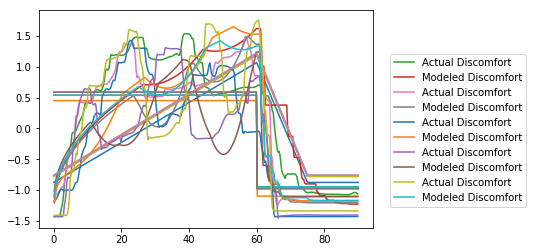

In [18]:
modelFit('TM115')

(360, 4)
0.39 -1.16 13.6 -0.48 0.05 1.92
RSSModel Check 110.776061406
rmse : 0.554717298885 RSS: 110.776061406 111.05175706 380.697606445
[[ 0.81890931  0.63318907]
 [ 0.63318907  0.69551877]]
correlation to our model: 0.838998291752
correlation to sawtooth: 0.847448214995
correlation to box: -0.0978318862616
0.38 -1.15 13.3 -0.42 0.09 1.97
RSSModel Check 25.6481209284
rmse : 0.266917178834 RSS: 25.6481209284 17.8092448176 279.78422893
[[ 0.83616053  0.76433933]
 [ 0.76433933  0.7631592 ]]
correlation to our model: 0.956827836531
correlation to sawtooth: 0.972499378034
correlation to box: 0.269647344502
0.4 -1.17 14.5 -0.48 0.04 1.64
RSSModel Check 35.0490265226
rmse : 0.312023087298 RSS: 35.0490265226 10.7632387436 248.794150243
[[ 0.74836687  0.69238265]
 [ 0.69238265  0.71575954]]
correlation to our model: 0.946030907427
correlation to sawtooth: 0.984583394229
correlation to box: 0.278109710069
0.39 -1.24 13.8 -0.66 0.09 1.76
RSSModel Check 159.950388426
rmse : 0.666563301207 RSS: 1

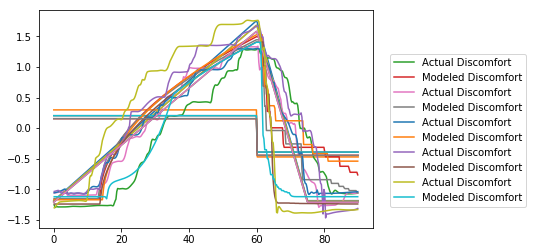

In [19]:
modelFit('TM201')

(360, 4)
0.34 -1.0 0.23 -0.17 9.99 8.92
RSSModel Check 217.19966339
rmse : 0.776744744627 RSS: 217.19966339 370.619866763 350.54277795
[[ 1.73125737  0.88218414]
 [ 0.88218414  0.63607277]]
correlation to our model: 0.840668987432
correlation to sawtooth: 0.670123823615
correlation to box: 0.685504193864
0.37 -1.1 0.0 -0.16 10.0 8.37
RSSModel Check 59.3850275245
rmse : 0.406150722996 RSS: 59.3850275245 92.3099849057 208.60427667
[[ 0.7155698   0.67738734]
 [ 0.67738734  0.8026849 ]]
correlation to our model: 0.893796250415
correlation to sawtooth: 0.80508212298
correlation to box: 0.534099997787
0.36 -0.97 1.68 -0.15 9.99 8.44
RSSModel Check 100.359648172
rmse : 0.527993182227 RSS: 100.359648172 217.258148512 77.6935980789
[[ 0.66409816  0.58961573]
 [ 0.58961573  0.70645077]]
correlation to our model: 0.860819255698
correlation to sawtooth: 0.552648748769
correlation to box: 0.889207761144
0.36 -1.14 0.02 -0.16 10.0 7.55
RSSModel Check 79.03951722
rmse : 0.46856612607 RSS: 79.03951722

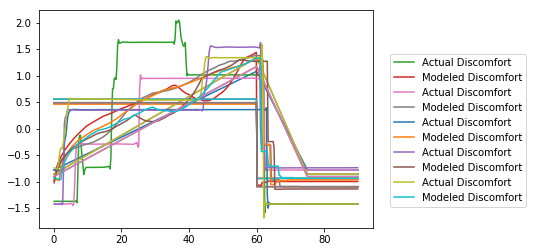

In [26]:
modelFit('TM202')

(360, 4)
0.33 -1.11 3.09 -0.72 0.12 5.99
RSSModel Check 26.6140130738
rmse : 0.271896697468 RSS: 26.6140130738 119.02696315 105.627159423
[[ 0.64550515  0.72859091]
 [ 0.72859091  0.88541127]]
correlation to our model: 0.963743286919
correlation to sawtooth: 0.733866521165
correlation to box: 0.751722900299
0.29 -1.02 3.62 -0.76 1.63 5.38
RSSModel Check 65.434713421
rmse : 0.42633683026 RSS: 65.434713421 156.820786672 185.455551339
[[ 1.10582925  0.8514115 ]
 [ 0.8514115   0.71698844]]
correlation to our model: 0.956179442276
correlation to sawtooth: 0.788160221699
correlation to box: 0.737031562896
0.31 -1.04 2.31 -0.1 1.7 5.0
RSSModel Check 90.5148523092
rmse : 0.501428105817 RSS: 90.5148523092 140.696962578 252.934882608
[[ 0.76726459  0.67532121]
 [ 0.67532121  0.77223089]]
correlation to our model: 0.877332516916
correlation to sawtooth: 0.7866759642
correlation to box: 0.550366541925
0.31 -1.0 2.95 -0.08 1.23 3.22
RSSModel Check 45.8639091945
rmse : 0.356931012609 RSS: 45.8639091

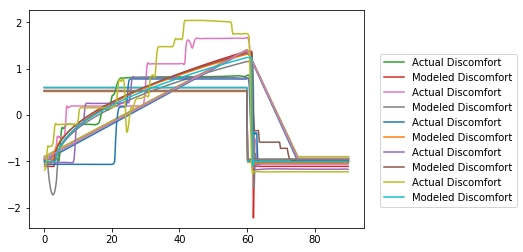

In [27]:
modelFit('TM203')

(360, 4)
0.33 -1.37 3.57 -0.46 0.0 0.11
RSSModel Check 179.810293911
rmse : 0.706734065008 RSS: 179.810293911 131.900182464 326.964897687
[[ 0.9376127   0.51161515]
 [ 0.51161515  0.39167799]]
correlation to our model: 0.84424222821
correlation to sawtooth: 0.886381450529
correlation to box: 0.490565652641
0.37 -1.69 2.39 -0.68 0.05 0.26
RSSModel Check 261.974264548
rmse : 0.85305702647 RSS: 261.974264548 208.425746195 192.856900516
[[ 0.52766076  0.34501208]
 [ 0.34501208  0.78980374]]
correlation to our model: 0.534437977609
correlation to sawtooth: 0.475328967337
correlation to box: 0.14468942046
0.35 -1.54 2.79 -0.01 2.18 0.11
RSSModel Check 194.98157319
rmse : 0.735945297616 RSS: 194.98157319 160.228378114 251.940250185
[[ 0.84040298  0.39064039]
 [ 0.39064039  0.43090646]]
correlation to our model: 0.649145188129
correlation to sawtooth: 0.722831931554
correlation to box: 0.524739405518
0.36 -1.64 2.39 -0.01 2.78 0.28
RSSModel Check 274.531826427
rmse : 0.873263079914 RSS: 274.53

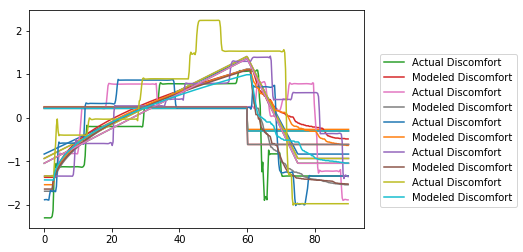

In [28]:
modelFit('TM204')

(360, 4)
0.05 -0.66 29.99 -0.27 2.72 0.68
RSSModel Check 192.338587849
rmse : 0.730940390959 RSS: 192.338587849 439.835237647 552.689261363
[[ 0.59316397  0.05504162]
 [ 0.05504162  0.00914246]]
correlation to our model: 0.747432945115
correlation to sawtooth: 0.768465765058
correlation to box: 0.307969337598
0.06 -0.66 29.99 -0.44 1.75 0.71
RSSModel Check 1039.19242551
rmse : 1.69901313309 RSS: 1039.19242551 516.26615125 644.278744651
[[ 1.18827428  0.09648091]
 [ 0.09648091  0.01385118]]
correlation to our model: 0.752037762628
correlation to sawtooth: 0.842928789904
correlation to box: 0.602568838819
0.06 -0.66 30.0 -0.65 2.19 0.69
RSSModel Check 818.856065971
rmse : 1.50817776911 RSS: 818.856065971 340.387236824 510.775076072
[[ 0.92593223  0.11794496]
 [ 0.11794496  0.02137496]]
correlation to our model: 0.838372673401
correlation to sawtooth: 0.944992353847
correlation to box: 0.470063773998
0.05 -0.66 29.97 -0.55 2.15 0.71
RSSModel Check 159.749814756
rmse : 0.666145243497 RSS: 

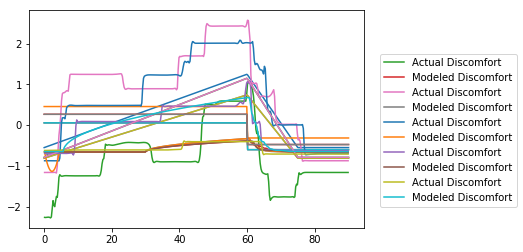

In [29]:
modelFit('TM205')

(360, 4)
0.26 -0.7 3.86 -0.45 10.0 2.09
RSSModel Check 323.901314568
rmse : 0.948538809854 RSS: 323.901314568 479.440244602 346.284810819
[[ 1.42804523  0.43595724]
 [ 0.43595724  0.32667701]]
correlation to our model: 0.638283507542
correlation to sawtooth: 0.277514545962
correlation to box: 0.666326200738
0.28 -0.57 1.53 -0.53 10.0 3.36
RSSModel Check 224.232301985
rmse : 0.789219554696 RSS: 224.232301985 124.89410604 220.363120061
[[ 0.55467883  0.371445  ]
 [ 0.371445    0.44987175]]
correlation to our model: 0.743582838272
correlation to sawtooth: 0.775576993531
correlation to box: 0.356059713399
0.25 -0.81 4.13 -0.48 9.97 2.15
RSSModel Check 239.448067486
rmse : 0.815557184258 RSS: 239.448067486 441.951756599 363.192654301
[[ 1.24803189  0.62033031]
 [ 0.62033031  0.3901642 ]]
correlation to our model: 0.888968661474
correlation to sawtooth: 0.208173855892
correlation to box: 0.452166950324
0.28 -0.79 4.01 -0.42 9.99 2.38
RSSModel Check 151.870921411
rmse : 0.649510331393 RSS: 15

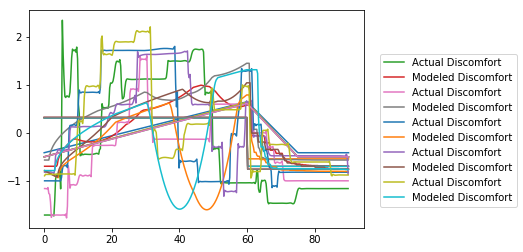

In [30]:
modelFit('TM206')

(360, 4)
0.26 -0.7 3.86 -0.45 10.0 2.09
RSSModel Check 323.901314568
rmse : 0.948538809854 RSS: 323.901314568 479.440244602 346.284810819
[[ 1.42804523  0.43595724]
 [ 0.43595724  0.32667701]]
correlation to our model: 0.638283507542
correlation to sawtooth: 0.277514545962
correlation to box: 0.666326200738
0.28 -0.57 1.53 -0.53 10.0 3.36
RSSModel Check 224.232301985
rmse : 0.789219554696 RSS: 224.232301985 124.89410604 220.363120061
[[ 0.55467883  0.371445  ]
 [ 0.371445    0.44987175]]
correlation to our model: 0.743582838272
correlation to sawtooth: 0.775576993531
correlation to box: 0.356059713399
0.25 -0.81 4.13 -0.48 9.97 2.15
RSSModel Check 239.448067486
rmse : 0.815557184258 RSS: 239.448067486 441.951756599 363.192654301
[[ 1.24803189  0.62033031]
 [ 0.62033031  0.3901642 ]]
correlation to our model: 0.888968661474
correlation to sawtooth: 0.208173855892
correlation to box: 0.452166950324
0.28 -0.79 4.01 -0.42 9.99 2.38
RSSModel Check 151.870921411
rmse : 0.649510331393 RSS: 15

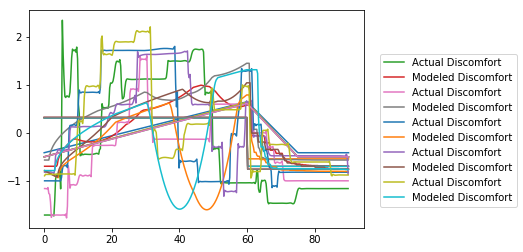

In [31]:
modelFit('TM206')

(360, 4)
0.27 -0.66 12.69 -0.16 9.99 0.45
RSSModel Check 316.211863221
rmse : 0.937211975342 RSS: 316.211863221 439.147264351 529.527457958
[[ 0.68161572  0.35845049]
 [ 0.35845049  0.42106999]]
correlation to our model: 0.669086440139
correlation to sawtooth: 0.60140986815
correlation to box: -0.176707337626
0.35 -1.36 10.78 0.0 9.93 0.25
RSSModel Check 57.0584883231
rmse : 0.398115311056 RSS: 57.0584883231 42.4005194031 104.093899173
[[ 0.27137222  0.37561139]
 [ 0.37561139  0.62360712]]
correlation to our model: 0.913062526591
correlation to sawtooth: 0.898153634076
correlation to box: 0.287057046002
0.23 -0.68 16.92 0.0 9.68 0.41
RSSModel Check 326.121671649
rmse : 0.951784393841 RSS: 326.121671649 331.574544271 630.45771842
[[ 1.16915679  0.49693925]
 [ 0.49693925  0.26307826]]
correlation to our model: 0.896033898674
correlation to sawtooth: 0.915555658717
correlation to box: 0.32738830735
0.22 -0.64 16.7 0.0 9.58 0.45
RSSModel Check 236.650542431
rmse : 0.810779019131 RSS: 236.6

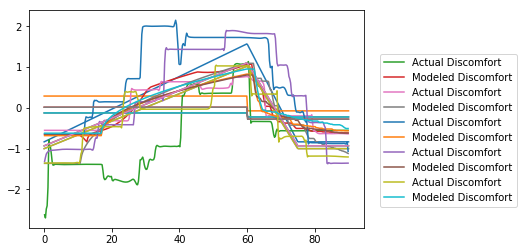

In [32]:
modelFit('TM207')

(360, 4)
0.34 -1.28 7.27 -0.47 0.1 0.28
RSSModel Check 164.181312397
rmse : 0.675321553856 RSS: 164.181312397 216.679537795 484.702222369
[[ 1.44058165  0.92182166]
 [ 0.92182166  0.67413851]]
correlation to our model: 0.935412995539
correlation to sawtooth: 0.842901151805
correlation to box: 0.444733701189
0.42 -1.4 8.82 -0.14 9.96 0.25
RSSModel Check 67.4830273994
rmse : 0.432958258828 RSS: 67.4830273994 44.7544223303 129.498085212
[[ 0.48508919  0.65426054]
 [ 0.65426054  1.00079222]]
correlation to our model: 0.939005140198
correlation to sawtooth: 0.922317056701
correlation to box: 0.51877604312
0.32 -1.22 6.58 -0.44 0.09 0.3
RSSModel Check 74.5512590401
rmse : 0.455067940716 RSS: 74.5512590401 33.0039848025 366.094947718
[[ 1.18712069  0.82219618]
 [ 0.82219618  0.63046253]]
correlation to our model: 0.950382376379
correlation to sawtooth: 0.981996373891
correlation to box: 0.381796286965
0.31 -1.2 6.07 -0.31 0.04 0.3
RSSModel Check 35.7090486381
rmse : 0.314947299992 RSS: 35.709

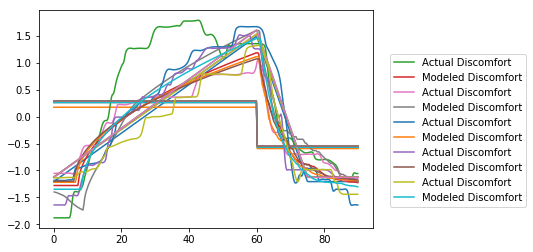

In [33]:
modelFit('TM208')

(360, 4)
0.28 -0.99 0.76 -0.11 5.68 5.9
RSSModel Check 57.9705552912
rmse : 0.40128458761 RSS: 57.9705552912 127.939969216 208.724870598
[[ 0.93795031  0.71396561]
 [ 0.71396561  0.64649585]]
correlation to our model: 0.916863129484
correlation to sawtooth: 0.791805706754
correlation to box: 0.622004014476
0.36 -0.92 10.99 -0.07 8.38 6.92
RSSModel Check 86.8173816814
rmse : 0.49107982402 RSS: 86.8173816814 99.9326578406 98.7827438683
[[ 0.43226401  0.5842365 ]
 [ 0.5842365   0.97213822]]
correlation to our model: 0.90126007907
correlation to sawtooth: 0.743545707081
correlation to box: 0.685873809803
0.32 -0.8 12.23 -0.03 5.22 6.88
RSSModel Check 91.1775375658
rmse : 0.503260308074 RSS: 91.1775375658 193.934674361 310.787072969
[[ 1.24306445  0.88839858]
 [ 0.88839858  0.7442381 ]]
correlation to our model: 0.923644997564
correlation to sawtooth: 0.802638147392
correlation to box: 0.606969855478
0.29 -0.91 4.3 -0.11 6.19 6.22
RSSModel Check 80.5214819278
rmse : 0.472938455967 RSS: 80.5

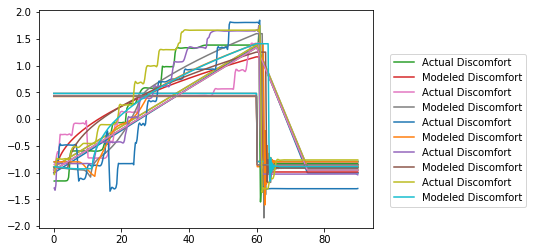

In [34]:
modelFit('TM210')

(360, 4)
0.3 -1.34 0.8 -0.16 5.32 0.49
RSSModel Check 388.439654309
rmse : 1.03874878568 RSS: 388.439654309 357.396937791 483.62345177
[[ 0.90059895  0.73609525]
 [ 0.73609525  0.65433291]]
correlation to our model: 0.958890278132
correlation to sawtooth: 0.903080076241
correlation to box: 0.637054198049
0.31 -1.28 4.86 -0.04 5.34 0.58
RSSModel Check 119.906691889
rmse : 0.577125761109 RSS: 119.906691889 93.3509297192 203.660264828
[[ 0.92588431  0.75362305]
 [ 0.75362305  0.69896941]]
correlation to our model: 0.936799659663
correlation to sawtooth: 0.870369749618
correlation to box: 0.645446887904
0.3 -1.35 0.01 -0.19 5.23 0.48
RSSModel Check 51.0548699697
rmse : 0.376588745516 RSS: 51.0548699697 109.43387898 248.002927788
[[ 0.98523047  0.79025743]
 [ 0.79025743  0.71271455]]
correlation to our model: 0.943065497263
correlation to sawtooth: 0.856047637717
correlation to box: 0.574973731589
0.34 -1.1 4.53 -0.12 9.99 0.42
RSSModel Check 58.4932372049
rmse : 0.403089586144 RSS: 58.4932

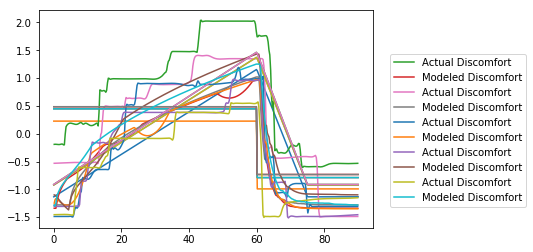

In [35]:
modelFit('TM211')

(360, 4)
0.35 -0.86 3.4 -0.43 7.29 4.39
RSSModel Check 238.071581476
rmse : 0.813209658417 RSS: 238.071581476 274.94049896 219.454251993
[[ 0.73153964  0.69692389]
 [ 0.69692389  0.91390821]]
correlation to our model: 0.852344438426
correlation to sawtooth: 0.572307736731
correlation to box: 0.727610815382
0.34 -0.79 5.62 -0.38 10.0 3.86
RSSModel Check 63.9884656595
rmse : 0.421599025074 RSS: 63.9884656595 312.315373486 153.913981109
[[ 1.14711264  0.84923763]
 [ 0.84923763  0.72744285]]
correlation to our model: 0.929665589629
correlation to sawtooth: 0.542785234304
correlation to box: 0.843068650203
0.32 -1.01 1.54 -0.27 7.68 4.37
RSSModel Check 58.3137108758
rmse : 0.402470533344 RSS: 58.3137108758 235.958079363 298.231757504
[[ 1.11777195  0.9273687 ]
 [ 0.9273687   0.83655189]]
correlation to our model: 0.959023811273
correlation to sawtooth: 0.772506094705
correlation to box: 0.611793681725
0.36 -0.85 4.04 -0.4 6.77 4.93
RSSModel Check 216.271502281
rmse : 0.775083332941 RSS: 216

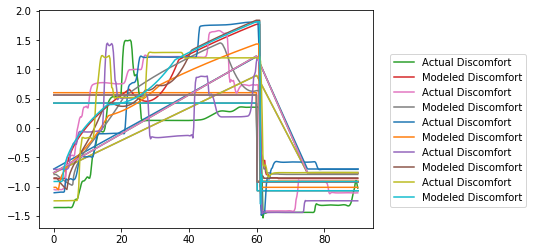

In [36]:
modelFit('TM212')

(360, 4)
0.44 -0.91 20.33 -0.19 2.89 0.42
RSSModel Check 86.4054647611
rmse : 0.489913441224 RSS: 86.4054647611 71.6177612204 186.13709972
[[ 0.51093399  0.68343335]
 [ 0.68343335  1.00293168]]
correlation to our model: 0.954724555843
correlation to sawtooth: 0.966574545149
correlation to box: 0.404814608243
0.44 -0.89 20.3 -0.22 2.93 0.45
RSSModel Check 90.2690388347
rmse : 0.500746772427 RSS: 90.2690388347 29.6493404109 273.575413402
[[ 0.74430302  0.79699877]
 [ 0.79699877  1.00483298]]
correlation to our model: 0.921585891913
correlation to sawtooth: 0.977985929175
correlation to box: 0.251462033122
0.43 -0.9 20.32 -0.18 2.97 0.5
RSSModel Check 22.2613062527
rmse : 0.248670387889 RSS: 22.2613062527 22.284669262 323.513633545
[[ 0.99012077  0.96055025]
 [ 0.96055025  0.99154281]]
correlation to our model: 0.969438519711
correlation to sawtooth: 0.973106826779
correlation to box: 0.31066330051
0.42 -0.93 20.32 -0.16 3.1 0.41
RSSModel Check 99.7119970516
rmse : 0.526286775046 RSS: 99.

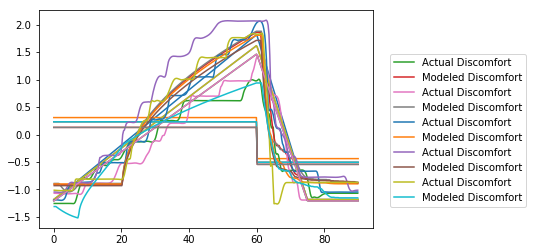

In [37]:
modelFit('TM214')

(360, 4)
0.02 -0.38 30.0 -0.07 0.14 0.0
RSSModel Check 209.909471303
rmse : 0.763597973237 RSS: 209.909471303 88.4271397136 192.497451665
[[ 0.54830821  0.01623636]
 [ 0.01623636  0.00229507]]
correlation to our model: 0.457697474984
correlation to sawtooth: 0.750814172557
correlation to box: 0.23806191758
0.36 -0.53 30.0 -0.01 0.97 2.74
RSSModel Check 197.518050636
rmse : 0.740716714922 RSS: 197.518050636 81.36825847 14.9653660478
[[ 0.00351824  0.00334466]
 [ 0.00334466  0.48445549]]
correlation to our model: 0.0810144630812
correlation to sawtooth: -0.0150598810517
correlation to box: 0.85586195266
0.02 -0.38 30.0 -0.25 0.07 0.0
RSSModel Check 692.037372146
rmse : 1.38647972713 RSS: 692.037372146 376.279614748 633.347809169
[[  1.35885684e+00   7.79852869e-04]
 [  7.79852869e-04   2.29506876e-03]]
correlation to our model: 0.0139645829739
correlation to sawtooth: 0.791562976678
correlation to box: -0.618276634941
0.02 -0.38 30.0 -0.47 0.09 0.0
RSSModel Check 132.62939305
rmse : 0.60

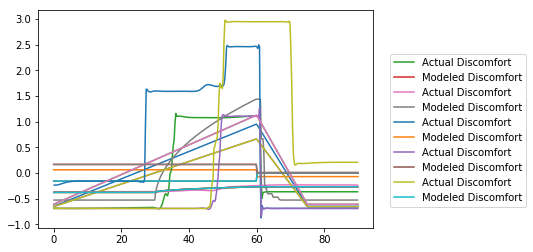

In [20]:
modelFit('TM116')

(360, 4)
0.33 -0.8 9.1 -0.1 10.0 0.95
RSSModel Check 142.323170309
rmse : 0.628762387351 RSS: 142.323170309 192.531832054 285.835005582
[[ 1.26499027  0.75975419]
 [ 0.75975419  0.56779699]]
correlation to our model: 0.896464234583
correlation to sawtooth: 0.792720120143
correlation to box: 0.709615859729
0.33 -0.8 8.36 -0.09 9.94 0.94
RSSModel Check 152.969759704
rmse : 0.651855811646 RSS: 152.969759704 150.120897269 347.611243422
[[ 1.27122499  0.87808348]
 [ 0.87808348  0.63969653]]
correlation to our model: 0.973727867541
correlation to sawtooth: 0.895429689617
correlation to box: 0.595944148077
0.35 -0.87 7.35 -0.19 9.99 0.88
RSSModel Check 94.3464198376
rmse : 0.511931038752 RSS: 94.3464198376 148.252810548 285.642185443
[[ 0.99237269  0.66851996]
 [ 0.66851996  0.59226318]]
correlation to our model: 0.872006274969
correlation to sawtooth: 0.781253281484
correlation to box: 0.476607196139
0.38 -1.36 6.19 -0.6 0.07 0.98
RSSModel Check 48.1712745388
rmse : 0.365799256343 RSS: 48.17

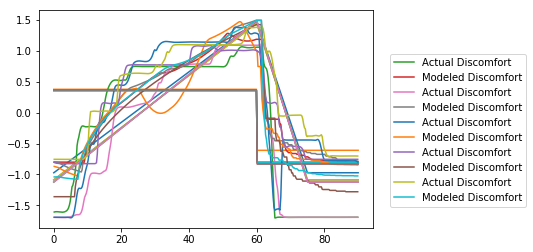

In [21]:
modelFit('TM117')

(360, 4)
0.31 -1.14 2.06 -0.48 0.11 0.67
RSSModel Check 124.233454351
rmse : 0.587446107104 RSS: 124.233454351 152.599348755 449.566524542
[[ 1.59296665  0.96294029]
 [ 0.96294029  0.66432536]]
correlation to our model: 0.936064124028
correlation to sawtooth: 0.901620446997
correlation to box: 0.48599540419
0.39 -1.08 11.55 -0.05 0.74 1.69
RSSModel Check 62.0650765532
rmse : 0.415214390918 RSS: 62.0650765532 70.5428949907 162.140076812
[[ 0.71617911  0.79244947]
 [ 0.79244947  1.04152934]]
correlation to our model: 0.917539986754
correlation to sawtooth: 0.875022433941
correlation to box: 0.617481687428
0.32 -1.16 1.83 -0.01 1.71 0.66
RSSModel Check 93.3187637007
rmse : 0.509135333735 RSS: 93.3187637007 63.5232407054 300.439361257
[[ 0.79523112  0.65642041]
 [ 0.65642041  0.73208034]]
correlation to our model: 0.860312077084
correlation to sawtooth: 0.925025451962
correlation to box: 0.338167001904
0.38 -1.1 10.99 -0.04 0.92 1.5
RSSModel Check 87.4591065963
rmse : 0.492891431014 RSS: 8

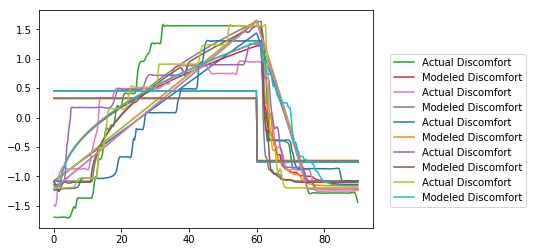

In [38]:
modelFit('TM216')

(360, 4)
0.24 -0.97 0.02 -0.58 2.63 3.5
RSSModel Check 98.5119068537
rmse : 0.523110108586 RSS: 98.5119068537 227.197181985 109.745662912
[[ 0.89607535  0.56477645]
 [ 0.56477645  0.49126582]]
correlation to our model: 0.851228269323
correlation to sawtooth: 0.544767513767
correlation to box: 0.812051753095
0.31 -1.02 0.01 -0.98 1.3 3.7
RSSModel Check 181.505905565
rmse : 0.710058498305 RSS: 181.505905565 165.734385091 207.041139588
[[ 0.3702584   0.41858362]
 [ 0.41858362  0.80864339]]
correlation to our model: 0.764982047163
correlation to sawtooth: 0.519263526717
correlation to box: 0.582919417927
0.29 -0.97 0.01 -0.93 1.4 3.55
RSSModel Check 150.944029272
rmse : 0.64752526607 RSS: 150.944029272 253.600507762 139.771980112
[[ 0.71761299  0.55154472]
 [ 0.55154472  0.70400602]]
correlation to our model: 0.775974415206
correlation to sawtooth: 0.432198164923
correlation to box: 0.78744338231
0.22 -0.95 0.03 -0.98 1.91 2.06
RSSModel Check 209.221600893
rmse : 0.762345796599 RSS: 209.22

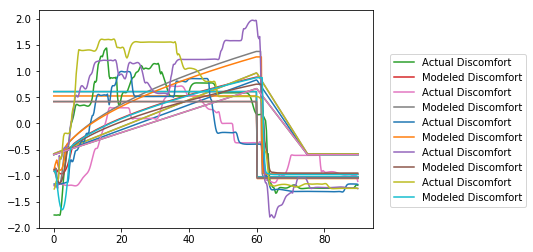

In [4]:
modelFit('TM217')

(360, 4)
0.37 -1.19 2.32 -0.56 9.99 0.47
rmse : 0.765574894863 RSS: 210.997771072 141.852765317 204.710775507
[[ 0.46612632  0.5743399 ]
 [ 0.5743399   0.86950561]]
correlation to our model: 0.902154626829
correlation to sawtooth: 0.871819899327
correlation to box: 0.524715692068
0.35 -1.18 7.8 -0.16 9.99 0.48
rmse : 0.579275076861 RSS: 120.801461282 150.088304321 173.731544048
[[ 0.7700956   0.58674855]
 [ 0.58674855  0.73348008]]
correlation to our model: 0.780702450332
correlation to sawtooth: 0.707564756172
correlation to box: 0.635089064605
0.29 -1.18 7.69 -0.76 0.04 0.63
rmse : 0.679738286457 RSS: 166.335889707 153.276888853 299.947394878
[[ 0.89684746  0.59271321]
 [ 0.59271321  0.54875753]]
correlation to our model: 0.844880081845
correlation to sawtooth: 0.792205984306
correlation to box: 0.410370121246
0.29 -1.11 6.25 -0.64 0.06 0.58
rmse : 0.604556259576 RSS: 131.575777557 122.97817573 416.390495554
[[ 1.13316992  0.63177538]
 [ 0.63177538  0.48691649]]
correlation to our mo

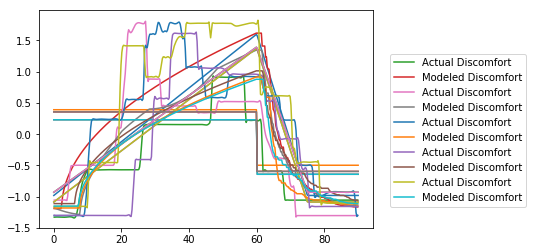

In [137]:
modelFit('TM218')

In [223]:
def modelFitAvgParams(a1,b1,c1,k1,h1,r1,a2,b2,c2,k2,h2,r2,name,threshold, fps):
     #Read in parameters for all 5 trials for subject

    # Read in discomfort Values
    filename = 'ResampledBlinks'+name+'_Trial1OK.txt'
    with open (filename, 'rb') as datafile:
        data1 = np.genfromtxt(datafile, delimiter = '\t', dtype=None)

    Signal = []
    term1 = []
    term2 = []
    term3 = []
    actualDisc = []
    totTime = []
    SSDModel = []
    for CurEntry in range (0, len(data1),1):
        tindex = CurEntry
        t_i = data1[tindex][2]
        totTime.append(data1[CurEntry][0])
        actualDisc.append(data1[CurEntry][1])
        ##first model term (when to take off)
        if ( t_i < c1 ):
            term1.append(0) 
        else:
            term1.append( a1*np.sqrt(t_i - c1))
        ## intent is to use a>0 and 0 <= c <= 20
       
        ## second model term 
        term2.append(b1) 
            
        if ( CurEntry == 0 ):
            term3.append(0) 
        else :
            previous_term3 = term3

            ## sum over j < i (sum where eyes are closed) - must read in fraction part?
            eye_closure_sum = 0.0
            for  j in range (0, CurEntry, 1):
                t_delta = t_i - data1[j][2]
                f_j = data1[j][3]
                if ( f_j > 0.0 and t_delta <= 2*h1 ):
                    Hij = (t_delta*(2*h1-t_delta))/pow(h1,2)
                    eye_closure_sum = eye_closure_sum + f_j*Hij
              
            ## third model term
            term3.append( k1*eye_closure_sum)
        if (t_i<= 60.0):
            Signal.append(term1[CurEntry] + term2[CurEntry] + term3[CurEntry])
        
        else:
            Signal.append(Signal[CurEntry-1] + t_delta*data1[CurEntry-1][3]*(-r1)*(Signal[CurEntry-1]-b1))
            
    SignalTS = []
    term1TS = []
    term2TS = []
    term3TS = []
    actualDiscTS = []
    totTimeTS = []
    SSDModelTS = []
    for CurEntry in range (0, len(data1),1):
        tindex = CurEntry
        t_i = data1[tindex][2]
        totTimeTS.append(data1[CurEntry][0])
        actualDiscTS.append(data1[CurEntry][1])
        ##first model term (when to take off)
        if ( t_i < c2 ):
            term1TS.append(0) 
        else:
            term1TS.append( a2*np.sqrt(t_i - c2))
        ## intent is to use a>0 and 0 <= c <= 20
       
        ## second model term 
        term2TS.append(b2) 
            
        if ( CurEntry == 0 ):
            term3TS.append(0) 
        else :
            previous_term3TS = term3TS

            ## sum over j < i (sum where eyes are closed) - must read in fraction part?
            eye_closure_sum = 0.0
            for  j in range (0, CurEntry, 1):
                t_delta = t_i - data1[j][2]
                f_j = data1[j][3]
                if ( f_j > 0.0 and t_delta <= 2*h2 ):
                    Hij = (t_delta*(2*h2-t_delta))/pow(h2,2)
                    eye_closure_sum = eye_closure_sum + f_j*Hij
              
            ## third model term
            term3TS.append( k2*eye_closure_sum)
        if (t_i<= 60.0):
            SignalTS.append(term1TS[CurEntry] + term2TS[CurEntry] + term3TS[CurEntry])
        
        else:
            SignalTS.append(SignalTS[CurEntry-1] + t_delta*data1[CurEntry-1][3]*(-r2)*(SignalTS[CurEntry-1]-b2))
    

    #print np.cov(actualDisc, Signal)
    #print "correlation to our model:", np.corrcoef(actualDisc, Signal)[0,1]
    filename = name + '_Data.txt'
    with open (filename, 'rb') as datafile:
        data = np.genfromtxt(datafile, delimiter = '\t', names=True,dtype=None)
    Blinks=[]
    #not every subject has exact same header so trying to call by comlumn - has an error
    data[:8,]
    
    for i in range (90*fps):
        if np.any(data['rmse'][i] >= threshold or data['false_negative'][i] == 1):  
            if np.any(data['false_positive'][i] == 0):
            # then we're in a blink
                Blinks.append(data['time_lined_up'][i])
    yvalue = 1
    ys = yvalue * np.ones(len(Blinks))
    plot(Blinks, ys, "k|",label='Blinks')
    plt.xlabel('Time')
    plt.ylabel('Discomfort (Z-standardized)')
    #plt.title('Predicted Discomfort Variance Between TS and Control Average Parameters')
    #plot (totTime, actualDisc, label='Actual Discomfort Control')
    plot (totTime, Signal , "--k", label='Modeled Discomfort Control' )
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    #plot (totTimeTS, actualDiscTS, label='Actual Discomfort')
    plot (totTimeTS, SignalTS, "g", label='Modeled Discomfort TS')
    plt.legend(bbox_to_anchor=(1.05, .8), loc=2, borderaxespad=0.)
    
    points = zip(totTimeTS, SignalTS)
    with open('expModeledDiscomfortTS.txt', 'w') as f:
        writer = csv.writer(f)
        writer.writerows(points)

    return 






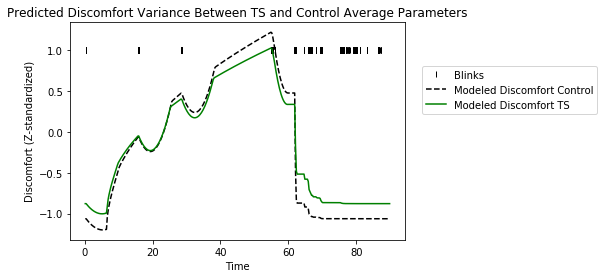

In [225]:
modelFitAvgParams(.328,-1.064,6.409,-.342,4.895,2.491,.274,-.879,6.530,-.312,4.704,1.718, 'TM101',.0255,60)

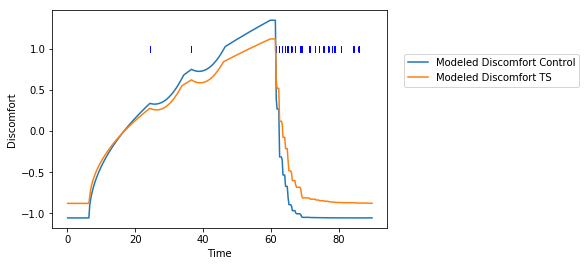

In [78]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM105', .029)

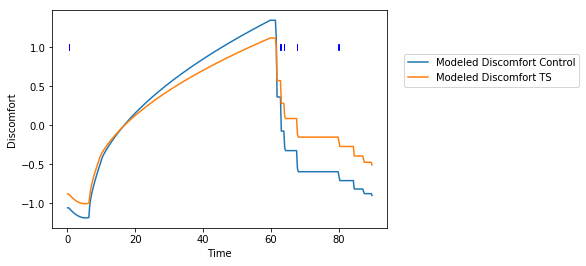

In [79]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM201', .030)

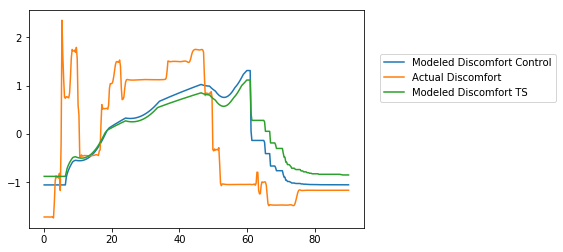

In [26]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM206')

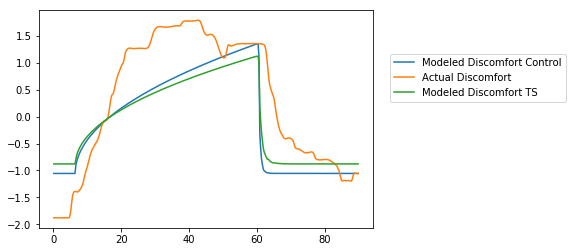

In [29]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM208')

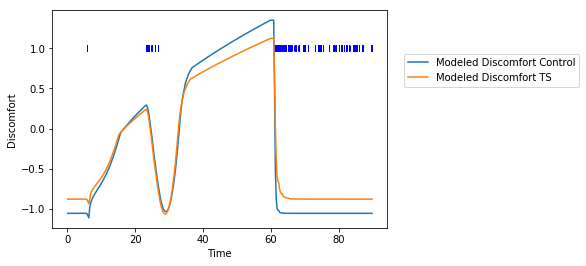

In [84]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM106', .023, 60)

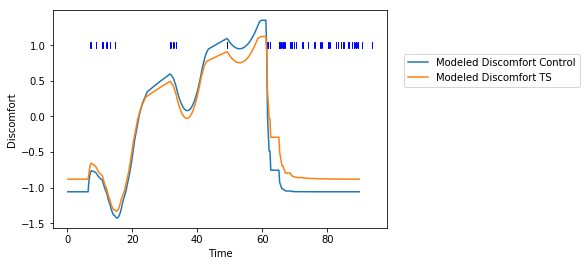

In [83]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM109',.0174,30)

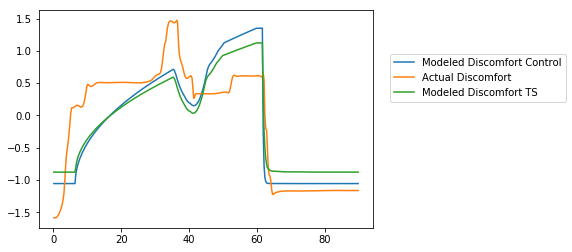

In [33]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM111')

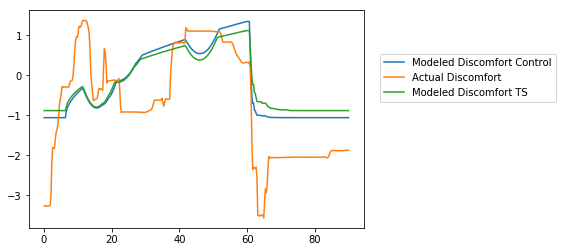

In [34]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM112')

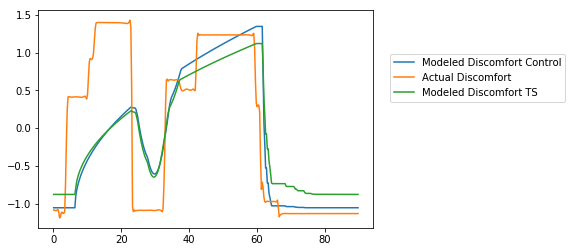

In [37]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM108')

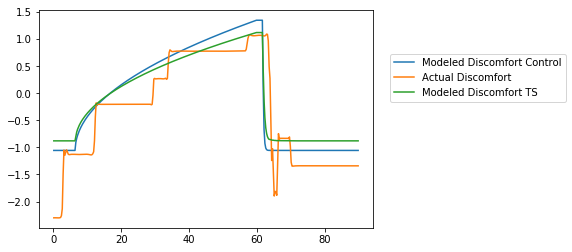

In [38]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM204')

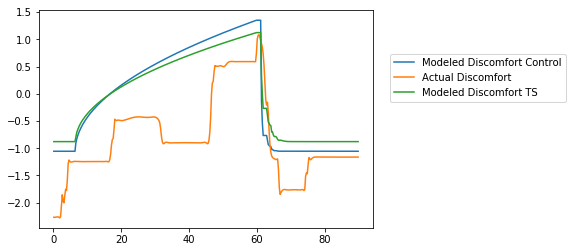

In [39]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM205')

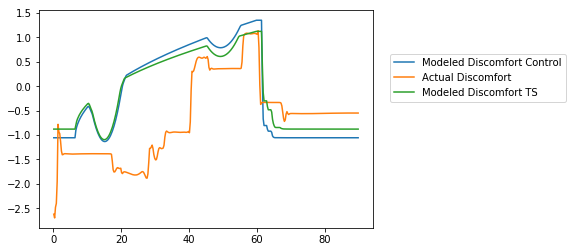

In [40]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM207')

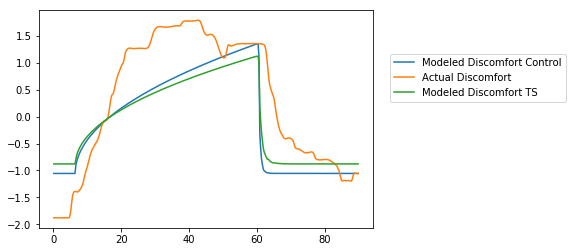

In [41]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM208')

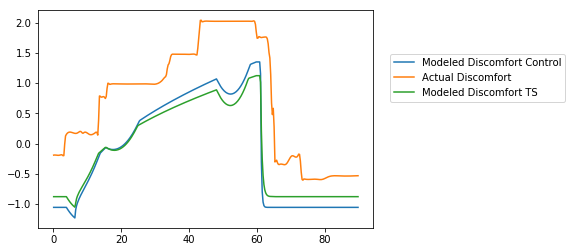

In [44]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM211')

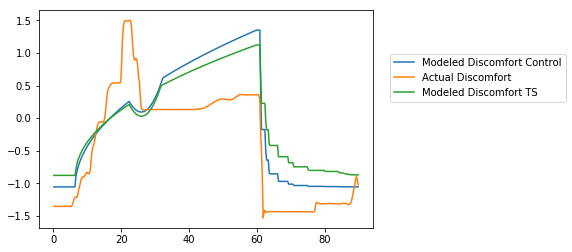

In [45]:
modelFitAvgParams(.329,-1.056,6.419,-.324,4.961,2.640,.274,-.879,6.530,-.312,4.704,1.718, 'TM212')